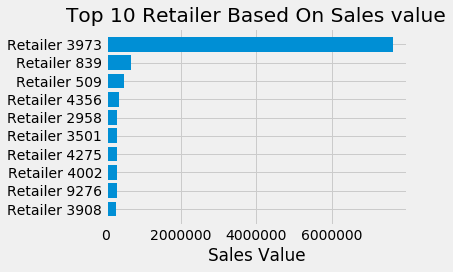

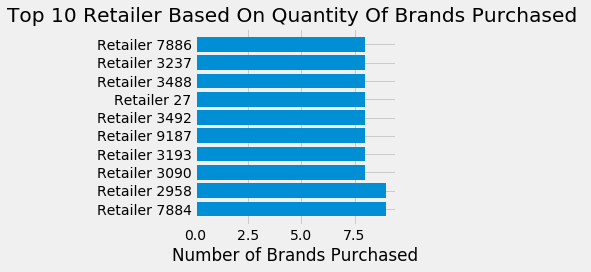

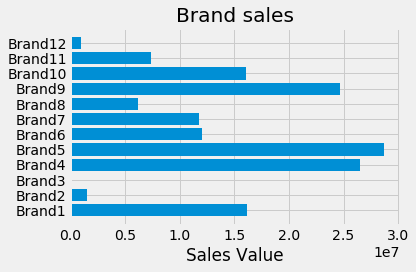

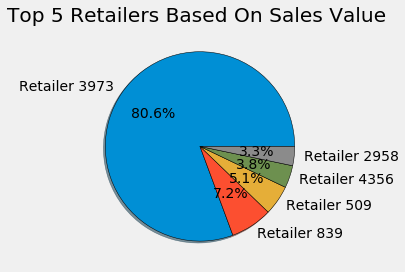

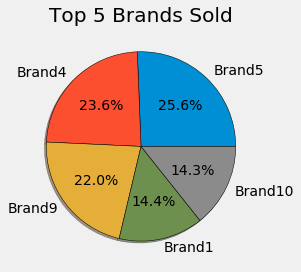

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
plt.style.use('fivethirtyeight')

df= pd.read_excel('Case Study Data 1.xlsx')


# create top retailer list based on total sales 

retailer_descending_sales=df.sort_values('Total Sales',ascending= False) # arrange retailer based on Total sales
retailer_descending_sales_10=retailer_descending_sales.head(10) # take top 10 values and assign them to variable

top_retailer_sales=retailer_descending_sales_10['Retailer Name'].tolist() # make a list of retailer names
top_retailer_sales_values=retailer_descending_sales_10['Total Sales'].tolist() # make a list of retailer's total sales

top_retailer_sales.reverse()
top_retailer_sales_values.reverse()

#plot a Horizontal bar chart representing top 10 retailers based on sales value
plt.barh(top_retailer_sales, top_retailer_sales_values)
plt.title('Top 10 Retailer Based On Sales value')
plt.xlabel('Sales Value')
plt.tight_layout()
plt.savefig('Top_10_Retailer_SALES.png')
plt.show()


#create top retailer list based on total brand purchased AKA regular retailer

retailer_descending_brand=df.sort_values('Number of Brands',ascending= False) #arrange retailer based on brand purchased
retailer_descending_brand_10=retailer_descending_brand.head(10)  # take top 10 values and assign them to variable
#retailer_descending_brand_10
top_retailer_brand=retailer_descending_brand_10['Retailer Name'].tolist() # make a list of retailer names
top_retailer_brand_number=retailer_descending_brand_10['Number of Brands'].tolist() 


#plot a Horizontal bar chart representing top 10 retailers based on number of brands purchased
plt.barh(top_retailer_brand, top_retailer_brand_number)
plt.title('Top 10 Retailer Based On Quantity Of Brands Purchased ')
plt.xlabel('Number of Brands Purchased')
plt.tight_layout()
plt.savefig('Top_10_Retailer_BRANDS.png')
plt.show()



# brand sales  - bar chart

brand1= df['Brand1'].sum() 
brand2= df['Brand2'].sum() 
brand3= df['Brand3'].sum() 
brand4= df['Brand4'].sum() 
brand5= df['Brand5'].sum() 
brand6= df['Brand6'].sum() 
brand7= df['Brand7'].sum() 
brand8= df['Brand8'].sum() 
brand9= df['Brand9'].sum() 
brand10= df['Brand10'].sum() 
brand11= df['Brand11'].sum() 
brand12= df['Brand12'].sum() 


brands=['Brand1','Brand2','Brand3','Brand4','Brand5','Brand6','Brand7','Brand8','Brand9','Brand10','Brand11','Brand12']
brand_total_sales=[brand1,brand2,brand3,brand4,brand5,brand6,brand7,brand8,brand9,brand10,brand11,brand12]
plt.barh(brands, brand_total_sales)
plt.title('Brand sales')
plt.xlabel('Sales Value')
plt.tight_layout()
plt.savefig('Top_10_BRANDS.png')
plt.show()



#TOP 5 Retailers- pie  chart
retailer_descending_sales_5=retailer_descending_sales.head(5) # take top 10 values and assign them to variable

top_retailer_sales_5=retailer_descending_sales_5['Retailer Name'].tolist() # make a list of retailer names
top_retailer_sales_values_5=retailer_descending_sales_5['Total Sales'].tolist() # make a list of retailer's total sales

plt.pie(top_retailer_sales_values_5, labels=top_retailer_sales_5, shadow = True ,autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("Top 5 Retailers Based On Sales Value ")
plt.tight_layout()
plt.savefig('TOP_5_Retailers.png')
plt.show()



# Top 5 brands - pie chart
brands=['Brand1','Brand2','Brand3','Brand4','Brand5','Brand6','Brand7','Brand8','Brand9','Brand10','Brand11','Brand12']
brand_total_sales=[brand1,brand2,brand3,brand4,brand5,brand6,brand7,brand8,brand9,brand10,brand11,brand12]
data = {'Brand':brands,
        'values':brand_total_sales}
newdf = pd.DataFrame(data)
top_5_brands=sorted(brand_total_sales,reverse = True)
new_brand=newdf.sort_values('values',ascending= False) 

new_brand_5=new_brand.head(5)

top_5_brand_name=new_brand_5['Brand'].tolist() # make a list of retailer names
top_5_brand_values=new_brand_5['values'].tolist()


plt.pie(top_5_brand_values, labels=top_5_brand_name, shadow = True ,autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("Top 5 Brands Sold")
plt.tight_layout()
plt.savefig('Top_5_brands.png')
plt.show()


#irregular retailer with ZER0 SALES

min_sales=df[df['Total Sales']==0]  # create a df with sales value of 0
min_sales_retailer=min_sales['Retailer Name'] # create a list of retailer name with Zero sales
min_sales_retailer = pd.DataFrame(min_sales_retailer) # convert the list into dataframe
min_sales_retailer=min_sales_retailer.rename(columns={"Retailer Name": "Irregular Retailer"}) # reamin the header 
min_sales_retailer_list=min_sales_retailer['Irregular Retailer'].tolist() 


# Average sales value
average=df['Total Sales'].mean()

#Regular retailer with total SALES above average sales

above_average_sales=df[df['Total Sales']>=average]  # create a df with sales value above average
above_average_sales_retailer=above_average_sales['Retailer Name'] #create a list of retailer name
above_average_sales_retailer = pd.DataFrame(above_average_sales_retailer) #convert the list into dataframe
above_average_sales_retailer=above_average_sales_retailer.rename(columns={"Retailer Name": "Regular Retailer"}) #rename
above_average_sales_retailer['Irreugular Retailer'] = pd.Series(min_sales_retailer_list) #merge regular and irregular
above_average_sales_retailer.to_excel("newCaseStudy.xlsx",index=False) #create new excel file